# One-way ANOVA

**Author: THEFFTKID**

Based on Jay L. Devore Lectures.

The **analysis of variance (ANOVA)** refers broadly to a collection of experimental situations and statistical procedures for the analysis of quantitative responses from experimental units. It involves the analysis either of data sampled from more than 
two numerical populations (distributions) or of data from experiments in which more than two treatments have been used. The characteristic that differentiates the treatments or populations from one another is called the factor under 
study, and the different treatments or populations are referred to as the levels of the factor.

*NOTE:* When the factor of interest is quantitative, statistical techniques from regression analysis can also be used to analyze the data

## How it works?

Single-factor ANOVA focuses on a comparison of more than two population or treatment means. Let,
- $I$ be number of pupulations
- $\mu_{1}$ the mean of population 1 or average response of treatment 1
- $\mu_{I}$ the mean of population I or average response of treatment I

The relevant hypotheses are $$H_{0}: \mu_{1} = \mu_{2} = \dots = \mu_{I}$$, versus $$H_{a}: \mu_{i} \neq \mu_{I}$$

The data consists in samples of different populations. Let, $J$ denote the number of observations in eahc sample, then the dataset consists of $IJ$ observations. The individual sample means will be denoted by $\bar{X_{1}},\bar{X_{2}},\dots,\bar{X_{I}}$, $$\bar{X}_{i} = \frac{\sum_{j=1}^{J}X_{ij}}{J}, \quad i \in \{1,2,\dots, I\}$$ Meanwhile, the **grand mean** is given by $$\bar{X} = \frac{\sum_{i=1}^{I}\sum_{j=1}^{J}X_{ij}}{IJ}$$ Additionally, let denote the sample variances as $$S^{2}_{i} = \frac{\sum_{j=1}^{J}(X_{ij} - \bar{X_{i}})^{2}}{J-1}$$

**Hint:** A rough rule of thumb is that if the largest $s$ is not much more than two times the smallest, it is reasonable to assume equal $\sigma^{2}$’s.

## The Test Statistic
If $H_{0}$ is true, the $J$ observations in each sample come from a normal population distribution with the same mean value $\mu$, in which case the sample means $\bar{x_{1}},\dots, x_{I}$ should be reasonably close to one another.

**Mean Square for Treatments (MSTr)** $$MSTr = \frac{J}{I-1}\sum_{i}(\bar{X_{i}} - \bar{X})^{2}$$

**Mean Square Error (MSTr)** $$MSE = \frac{S_{1}^{2} + S_{2}^{2} + \dots + S_{I}^{2}}{I}$$

$$F = \frac{MSTr}{MSE}$$

When $H_{0}$ is true and the basic assumptions of this section are 
satisfied, $F$ has an $F$ distribution with $v_{1} = I - 1$ and $v_{2} = I(J - 1)$. Because a larger $f$ is more contradictory to $H_{0}$ than a smaller $f$, the test is upper-tailed:

P-value = P($F \geq f$) when $H_{0}$ is true

### Summary

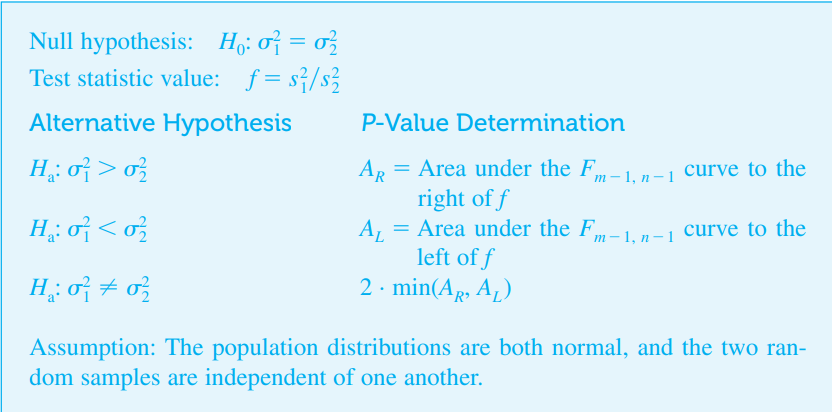

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Upload the data.
regular_df = pd.read_excel(r'G:\Mi unidad\Copy of Thermal Results & Analysis.xlsx', sheet_name='Regular Prod')
model_df = pd.read_excel(r'G:\Mi unidad\Copy of Thermal Results & Analysis.xlsx', sheet_name='Optimization')

In [3]:
# Selecting the variables of the Trip Times for all poles.
regular_poles = regular_df[['Trip time    P1 Normal', 'Trip time    P2 Normal', 'Trip time    P3 Normal']]
optimization_poles = model_df[['Trip time    P1 Optim', 'Trip time    P2 Optim', 'Trip time    P3 Optim']]

It is well known that many physical processes show a normal distribution, however we will demonstrate that assumption.

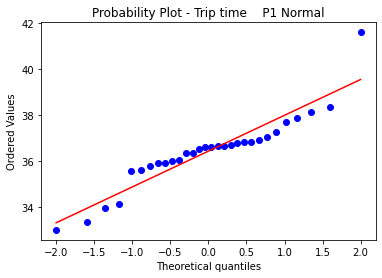

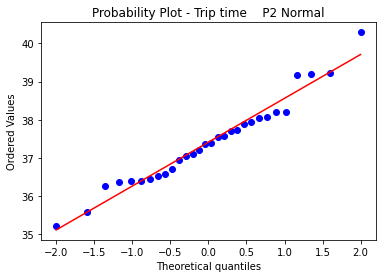

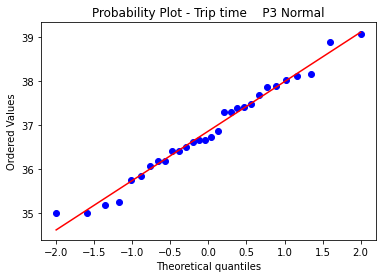

In [4]:
# Plots for Normal Poles
for i in list(regular_poles.keys()):
    stats.probplot(regular_poles[i], dist='norm', plot=plt)
    plt.title("Probability Plot - " +  i)
    plt.show()

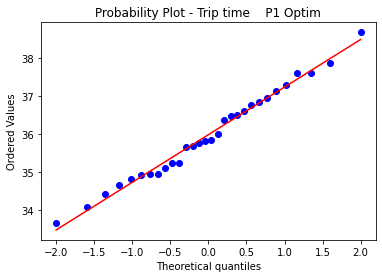

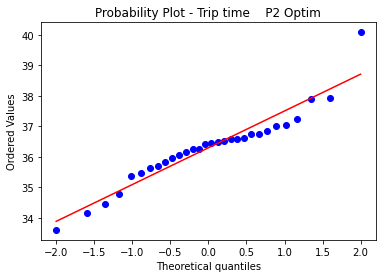

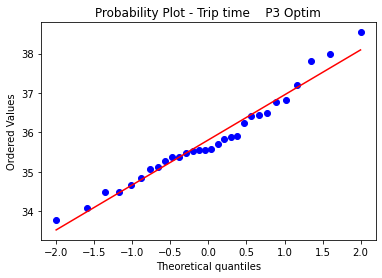

In [5]:
# Plots for Optimized Poles
for i in list(optimization_poles.keys()):
    stats.probplot(optimization_poles[i], dist='norm', plot=plt)
    plt.title("Probability Plot - " +  i)
    plt.show()

In [23]:
def ratio_of_std_Dv(df1, df2):
    '''
    Calculates the thumb rule of Samples Standard Deviation
    '''
    # Tuples with the pairs of DataFrame columns to compare.
    columns_lst = list(zip(list(df1.keys()), list(df2.keys())))
    
    # Dictionary output
    ratios = {}
    
    # Calculate ratio of the largest to the smallest sample standard deviation
    for i in columns_lst:
        ratio = max(df1[i[0]].std(), df2[i[1]].std()) / min(df1[i[0]].std(), df2[i[1]].std())
        ratios[f'{i}'] = ratio
        
    return ratios

In [24]:
ratios = ratio_of_std_Dv(regular_poles, optimization_poles)

In [25]:
ratios

{"('Trip time    P1 Normal', 'Trip time    P1 Optim')": 1.3175827084894212,
 "('Trip time    P2 Normal', 'Trip time    P2 Optim')": 1.0792002132627778,
 "('Trip time    P3 Normal', 'Trip time    P3 Optim')": 1.026381622099637}